In [1]:
# my solution to challenge 08_04 from the course:
# Jonathan Fernandes - pandas Essential Training
# https://www.linkedin.com/learning/pandas-essential-training

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('olympics.csv', skiprows=4) # data from 1896 ~ 2008
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


#### 1.
#### Plot the number of gold medals won by the US male and female athletes throughout the history of the Olympics?

In [4]:
df[ (df['NOC']=='USA') & (df['Medal']=='Gold') ].groupby(['Edition','Gender']).size()

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
1908     Men        34
1912     Men        45
1920     Men       103
         Women       7
1924     Men        95
         Women      15
1928     Men        34
         Women       9
1932     Men        61
         Women      17
1936     Men        44
         Women       7
1948     Men        75
         Women       8
1952     Men        72
         Women       7
1956     Men        57
         Women       4
1960     Men        51
         Women      17
1964     Men        63
         Women      15
1968     Men        59
         Women      24
1972     Men        37
         Women      16
1976     Men        56
         Women       7
1984     Men       106
         Women      62
1988     Men        49
         Women      28
1992     Men        57
         Women      32
1996     Men        59
         Women     101
2000     Men        68
         Women    

In [5]:
# unstacking and assigning to new dataframe
mynew = df[ (df['NOC']=='USA') & (df['Medal']=='Gold') ].groupby(['Edition','Gender']).size().unstack(fill_value=0)
mynew

Gender,Men,Women
Edition,,
1896,11,0
1900,26,1
1904,140,6
1908,34,0
1912,45,0
1920,103,7
1924,95,15
1928,34,9
1932,61,17


<Axes: xlabel='Edition'>

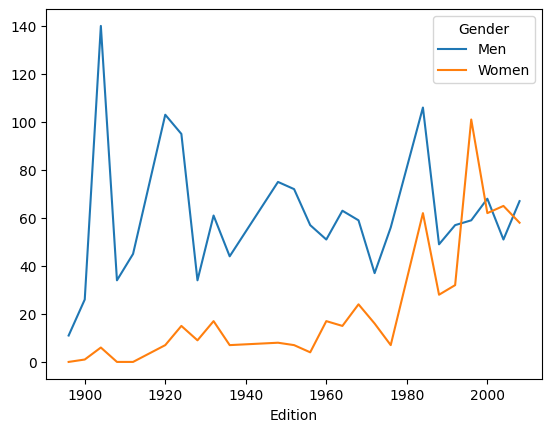

In [6]:
mynew.plot()

#### 2.
#### Plot the five athletes Who have won the most gold medals over the history of the Olympics.  
#### When there is a tie, consider the number of silver medals, and then bronze medals.

In [7]:
medalists = df.groupby(['Athlete','Medal']).size().unstack(fill_value=0)
medalists

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1
...,...,...,...
"ÖSTERVOLD, Jan Olsen",0,1,0
"ÖSTERVOLD, Kristian Olsen",0,1,0
"ÖSTERVOLD, Ole Olsen",0,1,0


In [8]:
# arranging the order of medals
medalists = medalists[['Gold','Silver','Bronze']] 
medalists

Medal,Gold,Silver,Bronze
Athlete,,,
"AABYE, Edgar",1,0,0
"AALTONEN, Arvo Ossian",0,0,2
"AALTONEN, Paavo Johannes",3,0,2
"AAMODT, Ragnhild",1,0,0
"AANING, Alf Lied",0,1,0
...,...,...,...
"ÖSTERVOLD, Jan Olsen",1,0,0
"ÖSTERVOLD, Kristian Olsen",1,0,0
"ÖSTERVOLD, Ole Olsen",1,0,0


In [9]:
# and sorting
five_medalists = medalists.sort_values(['Gold','Silver','Bronze'], ascending=False).head()
five_medalists

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


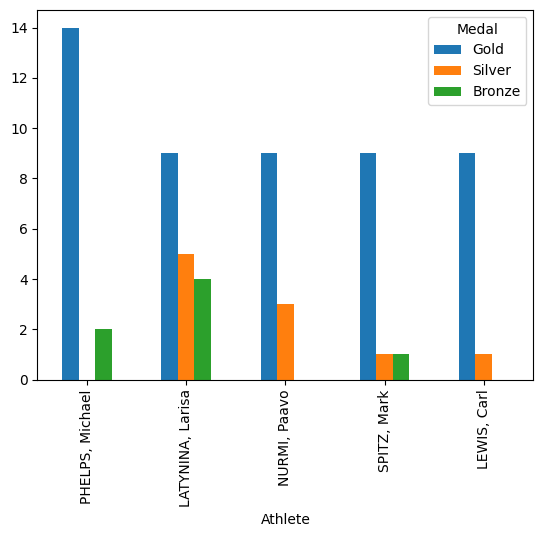

In [10]:
five_medalists.plot(kind='bar');

In [11]:
# done